In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# train = pd.read_csv("../input/train.csv", parse_dates = ["datetime"])
# test = pd.read_csv("../input/test.csv", parse_dates = ["datetime"])
train = pd.read_csv('train.csv', parse_dates = ['datetime'])
test = pd.read_csv('test.csv', parse_dates = ['datetime'])

In [57]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [58]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [59]:
train['year'] = train['datetime'].dt.year
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek

test['year'] = test['datetime'].dt.year
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek

In [60]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,4,5


In [61]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


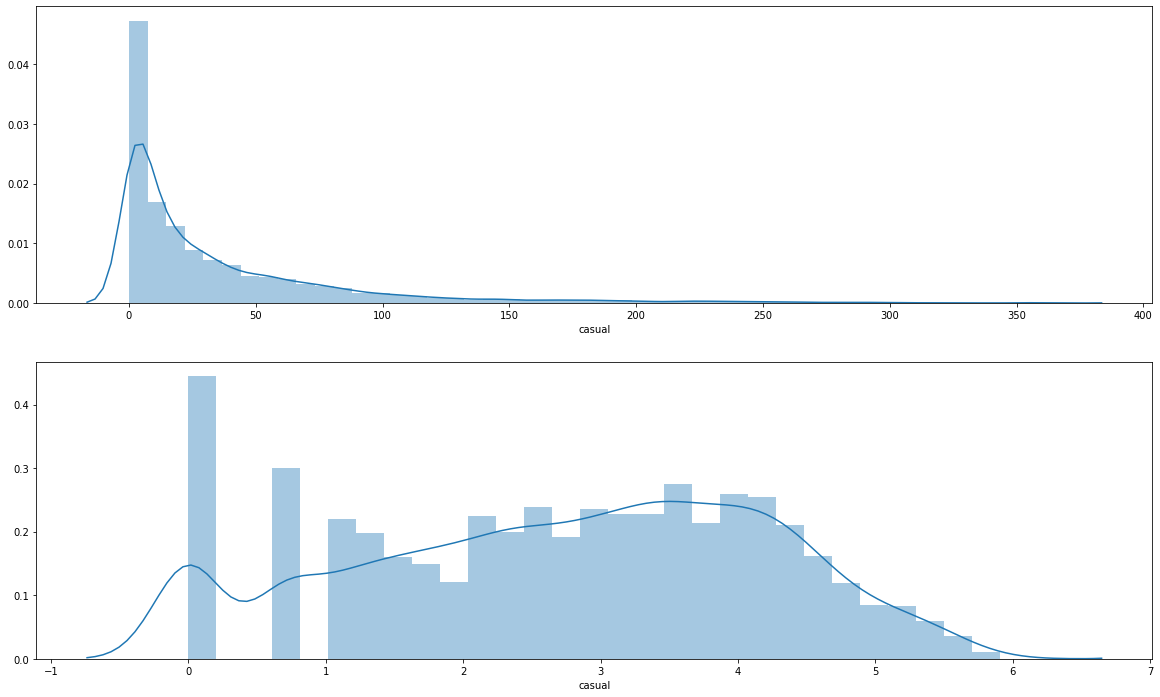

In [62]:
_,ax = plt.subplots(2,1, figsize=(20,12))
sns.distplot(train['casual'], ax = ax[0])
sns.distplot(np.log1p(train['casual']), ax = ax[1])

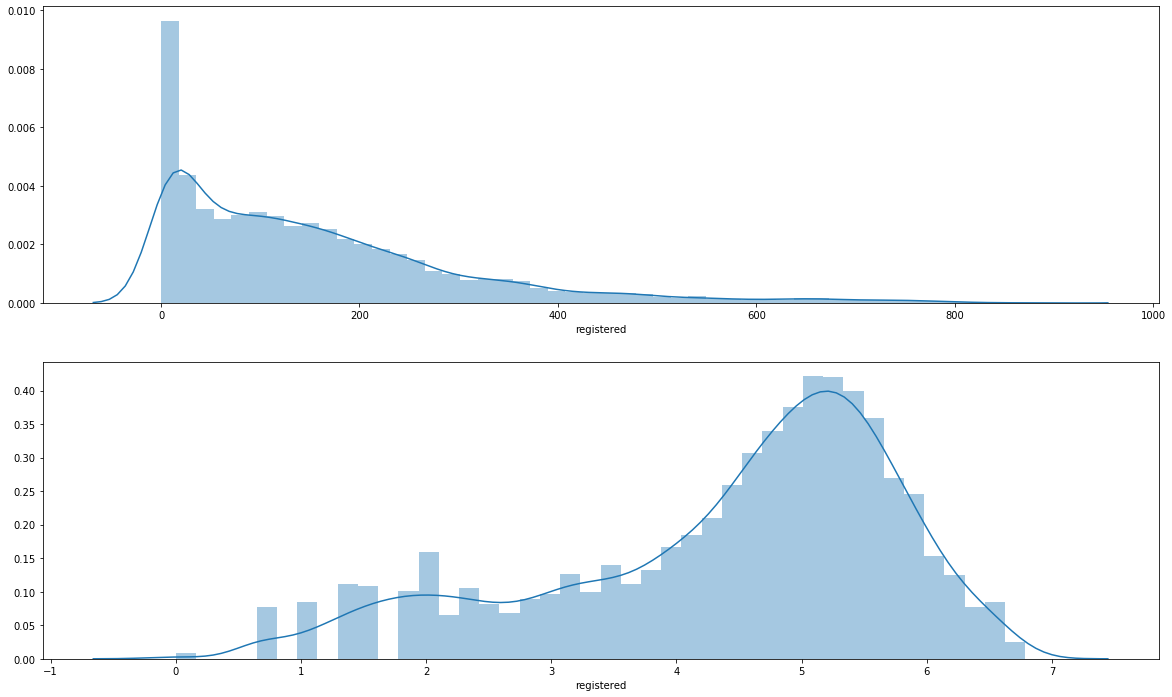

In [63]:
_,ax = plt.subplots(2,1,figsize = (20,12))
sns.distplot(train['registered'], ax = ax[0])
sns.distplot(np.log1p(train['registered']), ax = ax[1])

In [64]:
y_casual = np.log1p(train['casual'])
y_registered = np.log1p(train['registered'])
#y_train = np.log1p(train["count"])

In [65]:
train.drop(["datetime", "windspeed", "casual", "registered", "count"], 1, inplace=True)
test.drop(["datetime", "windspeed", ], 1, inplace=True)

In [66]:
# lightgbm package has to be installed
    # $ pip install lightgbm
import lightgbm as lgb
hyperparameters = { 'colsample_bytree': 0.725,  'learning_rate': 0.013,
                    'num_leaves': 56, 'reg_alpha': 0.754, 'reg_lambda': 0.071, 
                    'subsample': 0.523, 'n_estimators': 1093}
model = lgb.LGBMRegressor(**hyperparameters)
model.fit(train, y_casual)
preds1 = model.predict(test)

In [67]:
hyperparameters = { 'colsample_bytree': 0.639,  'learning_rate': 0.011,
                    'num_leaves': 30, 'reg_alpha': 0.351, 'reg_lambda': 0.587,
                   'subsample': 0.916, 'n_estimators': 2166}
model = lgb.LGBMRegressor(**hyperparameters, )
model.fit(train, y_registered)
preds2 = model.predict(test)

In [68]:
# submission=pd.read_csv('../input/sampleSubmission.csv')
submission=pd.read_csv('sampleSubmission.csv')
submission['count'] = np.expm1(preds1) + np.expm1(preds2)
# submission.to_csv('bike_lgb.csv', index=False)